In [654]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings

import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
warnings.filterwarnings('ignore')


#Step-1 - Read CSV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

### Read CSV

In [655]:
df= pd.read_csv("telecom_churn_data.csv")

### Data Filtration
Get missing value percentage

In [656]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

                         column_name  percent_missing
arpu_3g_6                  arpu_3g_6        74.846748
night_pck_user_6    night_pck_user_6        74.846748
total_rech_data_6  total_rech_data_6        74.846748
arpu_2g_6                  arpu_2g_6        74.846748
max_rech_data_6      max_rech_data_6        74.846748
...                              ...              ...
max_rech_amt_7        max_rech_amt_7         0.000000
max_rech_amt_6        max_rech_amt_6         0.000000
total_rech_amt_9    total_rech_amt_9         0.000000
total_rech_amt_8    total_rech_amt_8         0.000000
sep_vbc_3g                sep_vbc_3g         0.000000

[226 rows x 2 columns]


#### Missing value treatement
 1. Remove rows where the rows has around 100 missing values
 2. Impute values by using Iterative Imputer 
 3. Remove columns which only has 0s in it
 4. Remove rows with negative values in it

In [657]:
print('Before data Cleaning and imputation')
print(df.shape)
#Drop rows which has more tham 60% of missing values
df.dropna(axis=0, thresh=44, inplace=True)
print('Before data Cleaning and imputation')
print(df.shape)

#Calculate Missing percentage and carefully select the features for the 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_features = percent_missing[percent_missing > 70].index

print(missing_features)
#Select some features to eleminate noise
missing_features = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                   'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_6',
                    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
                    'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7','last_day_rch_amt_8', 'last_day_rch_amt_9','date_of_last_rech_data_9',
                    'total_og_mou_6', 'total_og_mou_7','total_og_mou_8', 'total_og_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7','loc_ic_mou_8', 
                    'loc_ic_mou_9', 'std_ic_mou_6', 'std_ic_mou_7','std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_ic_mou_9',
                    'onnet_mou_6', 'onnet_mou_7','onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9'
                    ,'mobile_number', 'circle_id', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
                    ,'night_pck_user_6','night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9','monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
                   'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9','monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9'
                    ,'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6','count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                   'total_rech_num_9', 'max_rech_amt_6', 'max_rech_amt_7','max_rech_amt_8', 'max_rech_amt_9'
                   ]
df.drop(missing_features, axis=1, inplace=True)

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

Before data Cleaning and imputation
(99999, 226)
Before data Cleaning and imputation
(99999, 226)
Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')
                       column_name  percent_missing
std_og_mou_9    

#### Remove columns with only zeroes in it

In [658]:
print('Before data Cleaning and imputation')
print(df.shape)

#Drop columns which has only zeroes in it
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 0.0).any(axis=0)]
print('After data Cleaning and imputation')
print(df.shape)



Before data Cleaning and imputation
(99999, 120)
After data Cleaning and imputation
(99999, 120)


#### Using Iterative Imputer to fill lot of NAN values

In [659]:
#Iterative imputer 
df_cols = df.columns
ii = IterativeImputer()
df = pd.DataFrame(ii.fit_transform(df))
df.columns=df_cols
print(df.head())

   loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0             0.0             0.0             0.0         1.6972      -5.076852           0.00   
1             0.0             0.0             0.0         0.0000       0.000000           0.00   
2             0.0             0.0             0.0         0.0000       0.000000           0.00   
3             0.0             0.0             0.0         0.0000      54.860000          44.38   
4             0.0             0.0             0.0         0.0000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0     -14.769656       8.033054      -2.058434           0.00     -23.757254          47.10184   
1       0.000000       0.000000       0.000000           0.00       0.000000          23.88000   
2      38.490000       0.000000       0.000000           0.00      70.940000           7.19000   
3       0.000000   

Drop following from dataframe
1. Columns containing zeroes
2. Rows containing -ve values due to iterative impute

In [660]:
#df.to_csv('C:\PCA\ImputedData.csv') 
#df= pd.read_csv('C:\PCA\ImputedData.csv')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
#print(df.head(10))
df.info()
df = df[(df > -0.0000001).all(1)]
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 0.0).any(axis=0)]
print(df.shape)



(99999, 120)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 120 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(120)
memory usage: 91.6 MB
(88331, 109)


#### Create Dervied features for MOU and drop unwanted columns

In [661]:
#Club minutes of usage of incoming and outgoing calls for all months
ic_att6=['roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6']
og_att6=['roam_ic_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']
ic_att7=['roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7']
og_att7=['roam_ic_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']
ic_att8=['roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8']
og_att8=['roam_ic_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']
ic_att9=['roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9']
og_att9=['roam_ic_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9']

#New derived columns
df['og_mou_6'] = df['roam_og_mou_6']+df['loc_og_t2t_mou_6']+df['loc_og_t2m_mou_6']+df['loc_og_t2f_mou_6']+df['loc_og_t2c_mou_6']+df['loc_og_mou_6']+df['std_og_t2t_mou_6']+df['std_og_t2m_mou_6']+df['std_og_t2f_mou_6']+df['std_og_mou_6']+df['isd_og_mou_6']+df['spl_og_mou_6']+df['og_others_6']
df['ic_mou_6'] = df['roam_ic_mou_6']+df['loc_ic_t2t_mou_6']+df['loc_ic_t2m_mou_6']+df['loc_ic_t2f_mou_6']+df['std_ic_t2t_mou_6']+df['std_ic_t2m_mou_6']+df['std_ic_t2f_mou_6']+df['spl_ic_mou_6']+df['isd_ic_mou_6']+df['ic_others_6']
df['og_mou_7'] = df['roam_og_mou_7']+df['loc_og_t2t_mou_7']+df['loc_og_t2m_mou_7']+df['loc_og_t2f_mou_7']+df['loc_og_t2c_mou_7']+df['loc_og_mou_7']+df['std_og_t2t_mou_7']+df['std_og_t2m_mou_7']+df['std_og_t2f_mou_7']+df['std_og_mou_7']+df['isd_og_mou_7']+df['spl_og_mou_7']+df['og_others_7']
df['ic_mou_7'] = df['roam_ic_mou_7']+df['loc_ic_t2t_mou_7']+df['loc_ic_t2m_mou_7']+df['loc_ic_t2f_mou_7']+df['std_ic_t2t_mou_7']+df['std_ic_t2m_mou_7']+df['std_ic_t2f_mou_7']+df['spl_ic_mou_7']+df['isd_ic_mou_7']+df['ic_others_7']
df['og_mou_8'] = df['roam_og_mou_8']+df['loc_og_t2t_mou_8']+df['loc_og_t2m_mou_8']+df['loc_og_t2f_mou_8']+df['loc_og_t2c_mou_8']+df['loc_og_mou_8']+df['std_og_t2t_mou_8']+df['std_og_t2m_mou_8']+df['std_og_t2f_mou_8']+df['std_og_mou_8']+df['isd_og_mou_8']+df['spl_og_mou_8']+df['og_others_8']
df['ic_mou_8'] = df['roam_ic_mou_8']+df['loc_ic_t2t_mou_8']+df['loc_ic_t2m_mou_8']+df['loc_ic_t2f_mou_8']+df['std_ic_t2t_mou_8']+df['std_ic_t2m_mou_8']+df['std_ic_t2f_mou_8']+df['spl_ic_mou_8']+df['isd_ic_mou_8']+df['ic_others_8']
df['og_mou_9'] = df['roam_og_mou_9']+df['loc_og_t2t_mou_9']+df['loc_og_t2m_mou_9']+df['loc_og_t2f_mou_9']+df['loc_og_t2c_mou_9']+df['loc_og_mou_9']+df['std_og_t2t_mou_9']+df['std_og_t2m_mou_9']+df['std_og_t2f_mou_9']+df['std_og_mou_9']+df['isd_og_mou_9']+df['spl_og_mou_9']+df['og_others_9']
df['ic_mou_9'] = df['roam_ic_mou_9']+df['loc_ic_t2t_mou_9']+df['loc_ic_t2m_mou_9']+df['loc_ic_t2f_mou_9']+df['std_ic_t2t_mou_9']+df['std_ic_t2m_mou_9']+df['std_ic_t2f_mou_9']+df['spl_ic_mou_9']+df['isd_ic_mou_9']+df['ic_others_9']

#Drop all the columns for which derived feature is created
df.drop(ic_att6, axis=1, inplace=True)
df.drop(og_att6, axis=1, inplace=True)
df.drop(ic_att7, axis=1, inplace=True)
df.drop(og_att7, axis=1, inplace=True)
df.drop(ic_att8, axis=1, inplace=True)
df.drop(og_att8, axis=1, inplace=True)
df.drop(ic_att9, axis=1, inplace=True)
df.drop(og_att9, axis=1, inplace=True)

#### Create dervied features for Recharge and data volume and drop un-wanted columns

In [662]:
drop_recharge = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9','jun_vbc_3g',
                    'jul_vbc_3g','aug_vbc_3g']


df['total_recharge_amt_6'] = df['total_rech_amt_6'] + df['jun_vbc_3g']
df['total_recharge_amt_7'] = df['total_rech_amt_7'] + df['jul_vbc_3g']
df['total_recharge_amt_8'] = df['total_rech_amt_8'] + df['aug_vbc_3g']
df['total_recharge_amt_9'] = df['total_rech_amt_9'] + df['sep_vbc_3g']

df.drop(drop_recharge, axis=1, inplace=True)

data_not_needed =  [ 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']

df['total_vol_mb_6'] = df['vol_2g_mb_6'] + df['vol_2g_mb_6']
df['total_vol_mb_7'] = df['vol_2g_mb_7'] + df['vol_2g_mb_7']
df['total_vol_mb_8'] = df['vol_2g_mb_8'] + df['vol_2g_mb_8']
df['total_vol_mb_9'] = df['vol_2g_mb_9'] + df['vol_2g_mb_9']

df.drop(data_not_needed, axis=1, inplace=True)

#### Filter out High Value Customers

In [663]:
print('Before filtering HVC', df.shape)
print(df.shape)

df['avg_recharge_amt_good_month'] = (df['total_recharge_amt_6'] + df['total_recharge_amt_7'])/2
df.drop(['total_recharge_amt_6','total_recharge_amt_7'], axis=1, inplace=True)

df= df[df.avg_recharge_amt_good_month < df.avg_recharge_amt_good_month.quantile(.70)]
df.head(10)
print('After filtering HVC', df.shape)
print(df.shape)

Before filtering HVC (88331, 18)
(88331, 18)
After filtering HVC (61829, 17)
(61829, 17)


### Add Churn Variable as Target Variable

In [664]:
#ideally we had used everything as zero but it only gives me around 2% of churn data
#considering very low usage is also an indicater that the customer 
df.loc[:, 'Churn'] = 0
df.loc[(df.og_mou_9 <= 10) & (df.total_vol_mb_9 <= 0) & (df.sep_vbc_3g == 0), 'Churn'] = 1

#### Churn rate before Outlier reduction

In [665]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
print("The churn % in the dataset is ", churn)
churn

The churn % in the dataset is  7.292694366721118


7.292694366721118

#### Removing Outliers 

In [666]:
Q1 = df.quantile(0.02)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(inplace = True)
df.head(100)

index     aon  sep_vbc_3g  og_mou_6  ic_mou_6  og_mou_7  ic_mou_7  og_mou_8  ic_mou_8  \
0       1  1006.0        0.00     75.92     26.82    336.50    104.22    612.10    423.26   
1       2  1103.0        0.00    263.58    370.01    724.52    519.47    519.79    394.99   
2       3  2491.0        0.00    435.46    280.05    298.69    271.44    725.32     97.48   
3       4  1526.0        0.00    254.53    216.43    482.65    198.28    416.31    338.80   
4       5  1471.0        0.00    138.87    155.38    114.14    158.74    199.88    157.11   
5       9   902.0        0.00    195.41    303.95    168.53    327.28    201.54    219.84   
6      11   339.0        0.00   1183.67    111.71     28.02     81.62      0.00    131.55   
7      12  3557.0        0.00    101.04     85.35    174.10    120.86    244.03    127.80   
8      13  2607.0        0.00   1822.14    992.12    420.06    316.78   2026.32   1216.59   
9      14   912.0        0.00     96.82    389.80     65.47    547.72    100.74    353.42   
10     17   667.0        0.00   2495.50     91.86     10.08      7.07     13.34      4.81   
11     18   364.0        0.00      5.52     30.90     49.94     60.02     65.70     24.87   
12     20  3108.0        0.00    542.50    202.20    621.20    171.82    404.39    182.07   
13     22   396.0        0.00    840.69    148.81     20.44     95.50      0.00      4.07   
14     23   604.0        0.00    268.63    119.56    280.06    222.87    478.92    298.28   
15     24  3072.0        0.00   1132.08    448.32    851.31    333.74    820.50    221.66   
16     25   517.0        0.00    833.03    180.98    995.63    119.52    494.08    141.12   
17     27   256.0        0.00    146.58      6.14    109.88      4.14    339.12      3.03   
18     28   502.0        0.00    137.58    329.15    101.44     76.68    159.89    329.97   
19     30   673.0        0.00      1.18     14.01    173.96    570.92    213.90    834.44   
20     31   223.0        0.00    715.88    145.01    964.82     82.64    112.37     34.54   
21     34  1587.0        0.00     53.78     65.06      2.10     19.21      7.62     36.51   
22     36   479.0        0.00    148.26    161.39    166.82    696.53    830.86    781.53   
23     39   424.0        0.00      4.36     43.94      0.00     50.20      0.00     62.92   
24     42  2614.0        0.00    329.54    250.59    250.93    182.90    348.37    245.23   
25     43  2372.0        0.00    402.17    112.71    421.06     80.03    381.16    100.86   
26     44  2715.0        0.00    231.47    107.10    149.05    107.75    471.41    116.83   
27     46  1092.0        0.00     71.97     59.81    356.33     86.22    529.39     83.04   
28     49  1292.0        0.00    130.45    237.37    228.21    348.95    370.75    277.22   
29     50  2574.0        0.00    249.51     89.77    448.38    170.47    249.60    166.39   
30     52   889.0        0.00     83.40      7.20      3.60      0.51     32.96      2.50   
31     54   538.0        0.00    234.34      1.76    571.67     10.84   3996.58     85.21   
32     55   694.0        0.00     39.68     63.17     88.89     46.13    149.47     95.70   
33     58   471.0        0.00    328.89     90.24    261.15     69.41    228.23     69.74   
34     59   259.0        0.00    539.50    423.92    567.51    647.17    521.35    495.44   
35     62   478.0        0.00    640.97    442.88    403.70    156.13    532.55     86.21   
36     63  1535.0        0.00    751.31    759.28    518.45    889.38    593.18    730.12   
37     64  2742.0        0.00    471.13    309.32    555.90    180.07    339.53    232.42   
38     65  2776.0        0.00    380.09     75.22    286.42     74.88    122.07     74.26   
39     66   973.0        0.00    159.49    117.31     81.23    153.56    113.84     68.58   
40     70   512.0        0.00    489.45    118.04    701.01    129.70    530.05    120.18   
41     71  1843.0        0.00    574.72    179.35    122.74    108.56    325.78     97.19   
42   

#### Churn rate after Outlier reduction

In [667]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

7.43578188373141

#### Train test split data

In [668]:
from sklearn.model_selection import train_test_split
print(df.shape)
# Putting feature variable to 
X = df.drop(['Churn'],axis=1)
# Putting response variable to y
y = df['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

(59913, 19)


#### Handling data imbalance using SMOTE

In [669]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

y_train = y_train.ravel()


After OverSampling, the shape of train_X: (41939, 18)
After OverSampling, the shape of train_y: (41939,) 

Before OverSampling, counts of label '1': 3138
Before OverSampling, counts of label '0': 38801 

After OverSampling, the shape of train_X: (77602, 18)
After OverSampling, the shape of train_y: (77602,) 

After OverSampling, counts of label '1': 38801
After OverSampling, counts of label '0': 38801


### PCA - In Action
1. Scale and fit the data
2. Fit the data in PCA
3. Draw a scree plot to explain cumulative variance
4. Perform PCA with n components
5. Use PCA and calulate accuracy score with 3 algorithms
    a. Logistic Regression
    b. SVM
    c. Boosting
    

In [670]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


In [671]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x)
print(pca.explained_variance_ratio_)

[0.24405797 0.14203511 0.13990325 0.08036322 0.05617466 0.05526757
 0.05097142 0.04015781 0.03669426 0.02859866 0.02548095 0.02261229
 0.02032565 0.01978709 0.01160498 0.01067798 0.0084623  0.00682483]


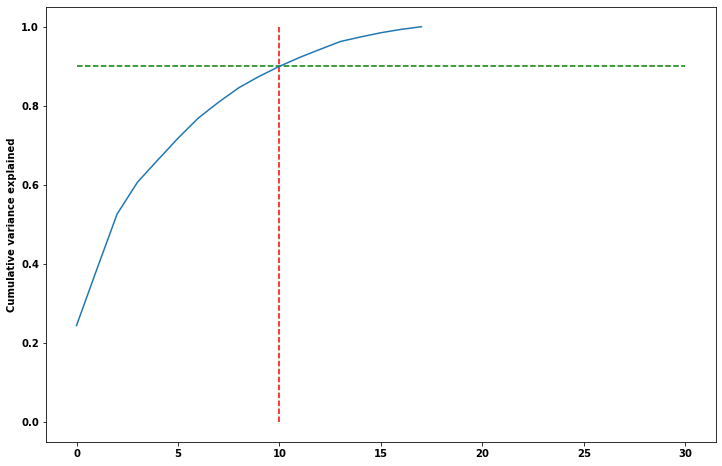

In [672]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 10 components

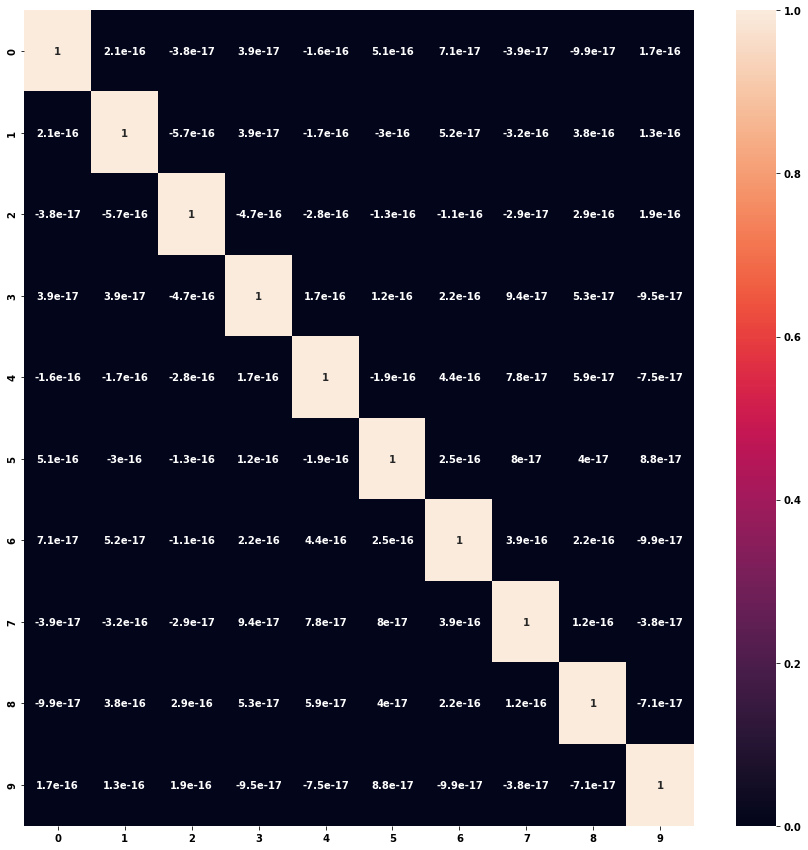

In [673]:
from sklearn.decomposition import IncrementalPCA

pca_final = PCA(n_components=10)
df_train_pca = pca_final.fit_transform(x)
df_test_pca = pca_final.transform(x_test)

corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### First Algo - Logistic Regression Using PCA

In [674]:
from sklearn.linear_model import LogisticRegression
logistic_pca = LogisticRegression(C= 0.1)
model_pca = logistic_pca.fit(df_train_pca, y_train)
print('score', model_pca.score(df_test_pca, y_test))

score 0.6370312673862245


### Second Algo - Using SVM

In [675]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(df_train_pca, y_train)
print('score', clf.score(df_test_pca, y_test))

score 0.6687437409591632


### Third Algo -  Boosting

In [676]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=200, random_state=2)
clf.fit(df_train_pca, y_train)
print('score', clf.score(df_test_pca, y_test))

score 0.6312451318571269


### Logistic Regression without PCA

The purpose here is to have some descriptive power to the assignment. With PCA its hard to explain the fetaures impacting the overall accuracy

In [677]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(x)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                77602
Model:                            GLM   Df Residuals:                    77583
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Apr 2020   Deviance:                          nan
Time:                        01:41:24   Pearson chi2:                 3.32e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.493e+15   2.41e+05   -6.2e+09      0.000   -1.49e+15   -1.49e+15
x1         -2.099e+13   2.41e+05  -8.71e+07      0.000    -2.1e+13    -2.1e+13
x2         -4.401e+13   2.49e+05  -1.77e+08      0.000    -4.4e+13    -4.4e+13
x3         -2.151e+14   2.43e+05  -8.86e+08      0.000   -2.15e+14   -2.15e+14
x4         -1.343e+14   3.17e+05  -4.24e+08      0.000   -1.34e+14   -1.34e+14
x5          1.031e+14   3.95e+05   2.61e+08      0.000    1.03e+14    1.03e+14
x6         -1.321e+14   3.79e+05  -3.49e+08      0.000   -1.32e+14   -1.32e+14
x7         -7.943e+13   4.75e+05  -1.67e+08      0.000   -7.94e+13   -7.94e+13
x8          1.234e+13   4.86e+05   2.54e+07      0.000    1.23e+13    1.23e+13
x9         -2.097e+13   4.99e+05   -4.2e+07      0.000    -2.1e+13    -2.1e+13
x10        -2.983e+15   4.94e+05  -6.04e+09      0.000   -2.98e+15   -2.98e+15
x11        -9.711e+12   4.35e+05  -2.23e+07      0.000   -9.71e+12   -9.71e+12
x12        -4.618e+13    3.6e+05  -1.28e+08      0.000   -4.62e+13   -4.62e+13
x13        -1.149e+14    4.4e+05  -2.61e+08      0.000   -1.15e+14   -1.15e+14
x14        -1.202e+13   3.11e+05  -3.86e+07      0.000    -1.2e+13    -1.2e+13
x15        -3.302e+13   3.31e+05  -9.97e+07      0.000    -3.3e+13    -3.3e+13
x16          1.22e+13   3.27e+05   3.73e+07      0.000    1.22e+13    1.22e+13
x17        -6.951e+14   3.01e+05  -2.31e+09      0.000   -6.95e+14   -6.95e+14
x18         3.064e+14   3.66e+05   8.36e+08      0.000    3.06e+14    3.06e+14
==============================================================================
"""

#### Correlation Matrix


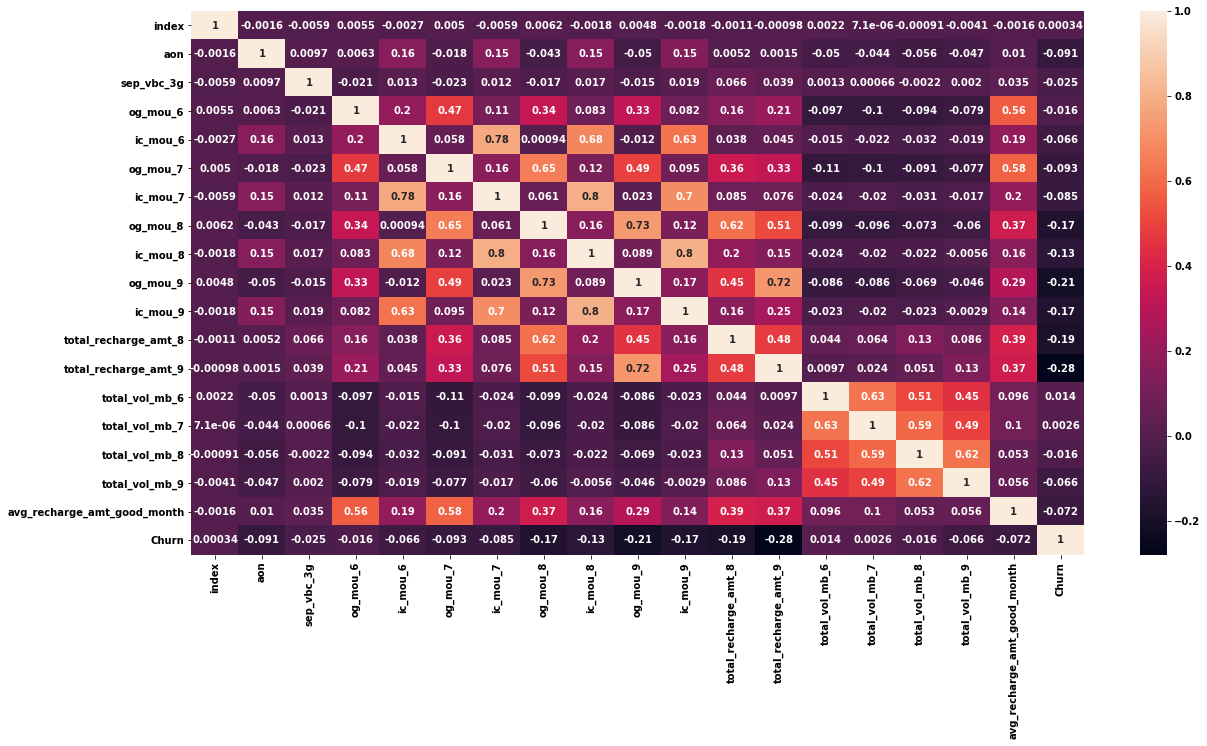

In [678]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

#### Accuracy of non PCA logistic Regression​

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression()
logreg.fit(x, y_train)
y_pred = logreg.predict(x_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.693279181039279
Sensitivity 1.0


#### Normal Logistic regression with some tuning parameters

In [680]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l1', solver='saga', C= 0.1)
logreg.fit(x, y_train)
y_pred = logreg.predict(x_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))


Accuracy 0.6808723712028486
Sensitivity 1.0


#### Tuning of Logistic Regression

In [681]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.0001, 0.001, 0.005, 0.01, 0.03, 0.3, 0.4, 1, 2], 'penalty':['l1', 'l2']}
estimator = LogisticRegression(class_weight='balanced')

model = GridSearchCV(estimator = estimator, cv=5, param_grid=params, scoring='recall')
model.fit(x, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.03, 0.3, 0.4, 1,
                               2],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [682]:
model.best_params_

{'C': 2, 'penalty': 'l2'}

#### Final Model with best parameters

In [683]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l2', solver='saga', C=2, class_weight='balanced')
logreg.fit(x, y_train)
y_pred = logreg.predict(x_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))


Accuracy 0.6813174585512407
Sensitivity 1.0
